### Adding the required Libraries

In [111]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.util import *
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import re
from collections import Counter
import datetime as dt

In [227]:
#Reading the dataset
tweets = pd.read_csv(r'C:\Users\tejas\Desktop\kanye_tweets.csv')
tweets.head(10)

,Date,Tweet_id,Verified,Text,User,Location,Source,Likes,Followers,Following,Retweets
0,21-07-2020 23:59,1.285730e+18,False,"@ferrari_simp I used to like ""Jesus Walks "" by...",chagreatleader4,United States,Twitter for Android,0,3,34,0
1,21-07-2020 23:58,1.285730e+18,False,"So in today's News, #KanyeWest filed papers in...",VitoDotTV,"Chicago, Illinois",Twitter Web App,0,1017,1016,0
2,21-07-2020 23:58,1.285730e+18,False,Idk why #Kanye’s fans are blaming everyone but...,Libra_attack,At Peace,Twitter for iPhone,0,62,77,0
3,21-07-2020 23:58,1.285730e+18,False,@935KDAY @GettyImages Bonus track list - almos...,OGsquints,"Montebello, CA",Twitter for Android,0,83,335,0
4,21-07-2020 23:56,1.285730e+18,False,#KanyeWest gained over 250.000 followers durin...,LOSTNOTFOUND404,The Moon,Twitter for iPhone,0,339,183,0
5,21-07-2020 23:55,1.285730e+18,False,@michaelsimpsonj @joelygabs @XXL Thank you for...,BlackTy21st,"B-Town, Toronto, Canada",Twitter for Android,1,246,325,0
6,21-07-2020 23:55,1.285730e+18,False,I legit searched in my google bar “Karen West”...,sarannmick,Philadelphia,Twitter Web App,0,47,189,0
7,21-07-2020 23:55,1.285730e+18,False,"When I see Kanye west down, I can't feel sorry...",JBossetti,"Fort Myers, FL",Twitter for iPhone,0,158,531,0
8,21-07-2020 23:55,1.285730e+18,False,"I used to like ""Jesus Walks "" by #KanyeWest .....",chagreatleader4,United States,Twitter for Android,0,3,34,0
9,21-07-2020 23:53,1.285720e+18,False,A sad day in DC to see how Mr.West was treatin...,wesfelton,Babylon Central,Twitter for Android,2,3015,807,0


In [4]:
tweets.shape

(12191, 11)

Our dataset contains 12191 rows and 11 columns.

In [5]:
tweets.describe()

,Tweet_id,Likes,Followers,Following,Retweets
count,1.219100e+04,12191.000000,1.219100e+04,12191.000000,12191.000000
mean,1.284935e+18,9.785580,2.552722e+04,1385.154786,1.797720
std,7.487794e+14,230.362846,3.382425e+05,5268.432014,39.683447
min,1.282630e+18,0.000000,0.000000e+00,0.000000,0.000000
25%,1.285000e+18,0.000000,4.800000e+01,107.000000,0.000000
50%,1.285160e+18,0.000000,2.520000e+02,386.000000,0.000000
75%,1.285410e+18,1.000000,1.134500e+03,1155.000000,0.000000
max,1.285730e+18,22829.000000,1.389604e+07,255953.000000,3913.000000


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12191 entries, 12190 to 0
Data columns (total 11 columns):
Date         12191 non-null object
Tweet_id     12191 non-null float64
Verified     12191 non-null bool
Text         12191 non-null object
User         12191 non-null object
Location     8673 non-null object
Source       12191 non-null object
Likes        12191 non-null int64
Followers    12191 non-null int64
Following    12191 non-null int64
Retweets     12191 non-null int64
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


The info function gives us the description of each columns- the datatype and the number of non-null values.

In [70]:
#Sorting the dataset according to the timestamp
tweets.sort_values(by = ['Date'], inplace = True, ascending = True)
tweets.head(10)

,Date,Tweet_id,Verified,Text,User,Location,Source,Likes,Followers,Following,Retweets
12190,13-07-2020 10:47,1.282630e+18,False,@kanyewest still be my favorite mood.. #Gemini...,TheIvyMermaid,"Paris, France",Twitter for Android,2,2,2,0
12189,13-07-2020 10:59,1.282630e+18,False,#DonaldTrump is proof that people are willing ...,BrightonJournal,"Brighton, England",Twitter Web App,0,3868,4911,0
12188,13-07-2020 11:30,1.282640e+18,False,The rise of such candidates is a sign of polit...,livewire,New Delhi,TweetDeck,2,5091,86,0
12187,13-07-2020 11:42,1.282640e+18,False,"Hello,\nDont Miss New Hit #Released #Track #Mu...",YatanZaid,NaN,Twitter Web App,2,2,49,0
12186,13-07-2020 11:46,1.282640e+18,False,🚨RAFFLES ARE LIVE🚨\n\nadidas Yeezy Boost 350 V...,snkrempire,Österreich,Twitter Web App,0,82,123,0
12185,13-07-2020 11:58,1.282650e+18,False,"Win, lose or draw, #KanyeWest could speak to t...",PinkGeology,"Euless, TX",Twitter Web App,0,178,582,0
12184,13-07-2020 12:06,1.282650e+18,False,@KaramelKonkeror @JoeBiden Here's some good ju...,JornolTalk40,NaN,Twitter for Android,0,3028,3968,0
12183,13-07-2020 12:07,1.282650e+18,False,@VoteBlueUS @JoeBiden @JoeBiden decency on dis...,JornolTalk40,NaN,Twitter for Android,0,3028,3968,0
12182,13-07-2020 12:10,1.282650e+18,False,Rapper #KanyeWest is back to making headlines ...,IndigoMusicCom,"Bangalore, India",Twitter Web App,0,3948,349,0
12181,13-07-2020 12:16,1.282650e+18,False,#America’s #plan to #save #SmallBusiness in th...,DiabeticCyborgg,"Longview, TX",Twitter Web App,1,6290,4680,1


Some of the tweets are retweets and might have been repeated. We need to remove those repeated tweets.

In [7]:
#Removing the duplicate tweets by converting the tweets into a set.
tweets_set=set(tweets.Text)
tweets_set

{'Kanye is deliberately attacking black people. He might be sick but the consistent attack on black people is intensifying. #KanyeWest',
 'The truth. #DaveChappelle #KanyeWest https://t.co/bGPmWsc29C',
 "#DobsRidiculosity folks really need to stop blaming the Kardashians for every #Kanye misadventures\n\nAt least, if you're to blame them for his fuck ups, credit them for his Ws too\n\n#KanyeWest #ye Kanye West",
 'That was his entire purpose. They paid this black man to go out there and say what he said. Are you done Kanye? Have you fulfilled your end of the bargain? \n@kanyewest \n#KanyeWest https://t.co/B4a4EiS2or',
 'These #KanyeWest tweets rn have me refreshing every couple of seconds 👀👀 poor man, it’s a cry for help for sure',
 '#BillGates, #ElonMusk, &amp; Other #BusinessLeaders See Their #twitterhacked Send Out a #ScamMessage\n#WarrenBuffett, #JeffBezos, #JoeBiden, &amp; #KanyeWest also had their #accountshacked. https://t.co/JTuNOrGpeU',
 "How did they even know Kanye's account

In [8]:
len(tweets_set)

12140

Our dateset has reduced from 12191 rows to 12140 rows.

In [35]:
#Converting the set into the dataframe
kanye = pd.DataFrame(tweets_set)
kanye.columns = ['Text']
kanye.head(10)

,Text
0,Kanye is deliberately attacking black people. ...
1,The truth. #DaveChappelle #KanyeWest https://t...
2,#DobsRidiculosity folks really need to stop bl...
3,That was his entire purpose. They paid this bl...
4,These #KanyeWest tweets rn have me refreshing ...
5,"#BillGates, #ElonMusk, &amp; Other #BusinessLe..."
6,How did they even know Kanye's account got hac...
7,@kanyewest Im here for the drama #KanyeWest
8,@kanyewest\n\nPlease check out my website. I a...
9,Trump &amp; Kanye putting to bed any notion th...


### Data Preprocessing

In [221]:
#Removing URLs 
kanye.Text = [re.sub(r'http\S+',"", i) for i in kanye.Text]

#Removing the retweet text 'RT'.
kanye.Text = [re.sub('^RT[\s]','',i) for i in kanye.Text]

#Removing the hashtag symbol '#'.
kanye.Text = [re.sub('#','',i) for i in kanye.Text]

#Removing all punctuations and numbers
kanye.Text = [re.sub('[^a-zA-Z]', ' ',i) for i in kanye.Text]

#Converting into lower case 
kanye.Text = [low.lower() for low in kanye.Text]

#Removing Emojis
def preprocess(Text):
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',Text)
    Text = re.sub('[\W]+',' ', Text.lower()) +\
    ' '.join(emojis).replace('-','')
     
    return Text
    
kanye.Text = kanye.Text.apply(preprocess)


kanye.Text.head(10)

0    kany deliber attack black peopl might sick con...
1                          truth davechappel kanyewest
2    dobsridiculos folk realli need stop blame kard...
3    entir purpos paid black man go say said done k...
4    kanyewest tweet rn refresh everi coupl second ...
5    billgat elonmusk amp businesslead see twitterh...
6    even know kany account got hack suddenli start...
7                         kanyewest im drama kanyewest
8    kanyewest plea check websit help may servic th...
9    trump amp kany put bed notion wealth intellect...
Name: Text, dtype: object

We need to remove the stopwords from our tweets inorder to get a better analysis on the sentiments of the audience.

In [37]:
#Checking the stopwords list
cachedStopWords=set(stopwords.words("english"))
print(cachedStopWords)

{'them', 'couldn', "you've", 'her', 'there', 'o', 'you', 'have', 'am', 'through', 'will', 'me', 'm', 'a', 'myself', "that'll", 'he', 'nor', 'should', 'just', 'both', "won't", 'very', 'she', "you're", 'needn', 'being', 'now', 'your', 'were', 'hasn', 'shouldn', 'their', 'other', "she's", "mightn't", 'if', 'don', "it's", 'all', 'aren', "couldn't", 'into', 'is', 'having', 'in', 'weren', 'yourselves', 'this', 'that', 'll', 'from', 'these', 'had', 'what', 'him', 'hers', 'where', 'over', 'for', 'or', 'while', 'but', 'then', "hadn't", 'itself', "weren't", 'did', 'up', "you'd", 'most', 'when', 'than', 'haven', 'below', 've', 'of', 's', 'each', 'too', "didn't", 'isn', "wouldn't", 'only', 'the', 'why', 'during', 'some', 'with', 'further', 'mightn', "shan't", 'i', 'doesn', "doesn't", 'and', 'because', 'whom', "hasn't", 'it', 'can', 'by', "needn't", 'once', 'herself', 'between', 'doing', 't', "don't", 'no', 'theirs', 'down', 'above', 'how', 'own', 'ain', 'after', 'any', 'won', 'those', 'are', 'not'

In [38]:
#Removing Stop Words
kanye.Text=kanye.Text.apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in cachedStopWords]))

#Stemming
porter = PorterStemmer()
def stemWords(word):
    return porter.stem(word)
        
kanye["Text"] = kanye["Text"].apply(lambda tweet: ' '.join([stemWords(word) for word in tweet.split()]))

In [39]:
#Lemmatization: 
lema = WordNetLemmatizer()
def lemmatizeWords(word):
    return lema.lemmatize(word)
kanye.Text = kanye.Text.apply(lambda tweet: ' '.join([lemmatizeWords(word) for word in tweet.split()]))


After removing the stopwords we have performed Stemming and Lemmatizations to get the root word of the different words in the tweets.

### Tfidf Vectorizer

TfidfVectorizer is a method to transforms text to feature vectors that can be used as input to estimator giving the importance of the word in the sentence.

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Definining the vectorizer 
vect = TfidfVectorizer(ngram_range=(1,1), max_features=100,smooth_idf=True,use_idf=True).fit(kanye.Text)

# Transform the vectorizer
X_txt = vect.transform(kanye.Text)

# Transforming to a data frame 
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
X.head(10)

,abort,actual,album,america,amp,back,biden,bipolar,black,call,campaign,chancetherapp,come,covid,crazi,drop,elect,elonmusk,even,famili,feel,first,free,fuck,get,give,go,good,got,hack,harriet,harriettubman,health,help,hope,ill,joebiden,joke,kany,kanyewest,kardashian,kim,kimkardashian,know,let,like,look,love,make,man,mental,music,need,never,new,one,peopl,person,plea,polit,presid,presidenti,ralli,real,realli,right,run,said,say,see,shit,show,slave,someon,still,stop,support,take,talk,thing,think,thought,time,tri,trump,tubman,tweet,twitter,via,vote,want,watch,way,well,west,white,world,would,ye,yeezi
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.737554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.186708,0.088768,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.642864,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.410844,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.361811,0.086010,0.345540,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.276083,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.372138,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.40092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267721,0.0,0.0,0.0,0.355508,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.439809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.391959,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.222671,0.211733,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.416267,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.475717,0.39867,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.477486,0.0,0.0,0.000000,0.0,0.000000,0.143889,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.565769,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.656665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.698688,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446184,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.401576,0.0,0.000000,0.089367,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.378821,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.34877,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.356577,0.733204,0.0,0.

### Sentiment Analysis

In [246]:
pol = []
for i in kanye.Text:
    blob = TextBlob(i)
    pol.append(blob.sentiment.polarity)
print(pol)

[-0.34920634920634924, 0.0, -0.35, -0.16666666666666666, 0.033333333333333326, 0.0, 0.0, 0.0, 0.0, -0.3125, 0.0, 0.8, 0.0, 0.0, 0.14545454545454545, 0.0, 0.0, 0.0, -0.039393939393939405, -0.1, 0.0, 0.34285714285714286, 0.4666666666666666, 0.0, -0.8, 0.0, 0.0, 0.0, 0.1, 0.25, 0.0, -0.05555555555555555, 0.0, 0.0, 0.0, 0.0, -0.4000000000000001, 0.0, 0.0, 0.0, 0.0, -0.16666666666666666, 0.0, 0.125, -0.3458333333333333, -0.5, 0.2857142857142857, -0.02500000000000001, 0.2857142857142857, -0.19583333333333336, -0.175, 0.9, 0.5, 0.2857142857142857, 0.04999999999999999, 0.1375, 0.0, 0.0, 0.175, 0.0, 0.125, 0.0, 0.14285714285714285, 0.6, -0.15000000000000002, 0.0, 0.0, 0.0, -0.1, 0.4681818181818182, -0.4, 0.35, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.19318181818181818, -0.05, 0.5, 0.0, 0.0, -0.12083333333333332, 0.0, 0.0, 0.0, 0.35, 0.0, -0.03333333333333333, -0.5, 0.0, 0.39999999999999997, 0.6, -0.8, -0.175, 0.0, 0.0, 0.0, -0.13333333333333333, 0.16666666666666666, 0.0, 0

In [46]:
#Adding polarity to the dataframe
kanye['Polarity']=pol
kanye.head()

,Text,Polarity
0,kany deliber attack black peopl might sick con...,-0.349206
1,truth davechappel kanyewest,0.000000
2,dobsridiculos folk realli need stop blame kard...,-0.350000
3,entir purpos paid black man go say said done k...,-0.166667
4,kanyewest tweet rn refresh everi coupl second ...,0.033333


In [87]:
#Counting the number of tweets based on the polarity
positive=0
negative=0
neutral=0
sent=[]

for i in pol:
    if i>0:
        positive+=1
        sent.append('Positive')
    elif i<0:
        negative+=1
        sent.append('Negative')
    else:
        neutral+=1
        sent.append("Neutral")
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets:",neutral)

kanye['Sentiment']=sent
kanye.head()

Positive Tweets: 4035
Negative Tweets: 2755
Neutral Tweets: 5350


,Text,Polarity,Sentiment
0,kany deliber attack black peopl might sick con...,-0.349206,Negative
1,truth davechappel kanyewest,0.000000,Neutral
2,dobsridiculos folk realli need stop blame kard...,-0.350000,Negative
3,entir purpos paid black man go say said done k...,-0.166667,Negative
4,kanyewest tweet rn refresh everi coupl second ...,0.033333,Positive


In [88]:
#Splitting words by polarity
pos_words=[]
neg_words=[]
neu_words=[]

for i,tweet in enumerate(kanye.Text):
    for word in tweet.split():
        if kanye.Polarity[i]>0:
            pos_words.append(word)
        elif kanye.Polarity[i]<0.:
            neg_words.append(word)
        else:
            neu_words.append(word)


### WordCloud


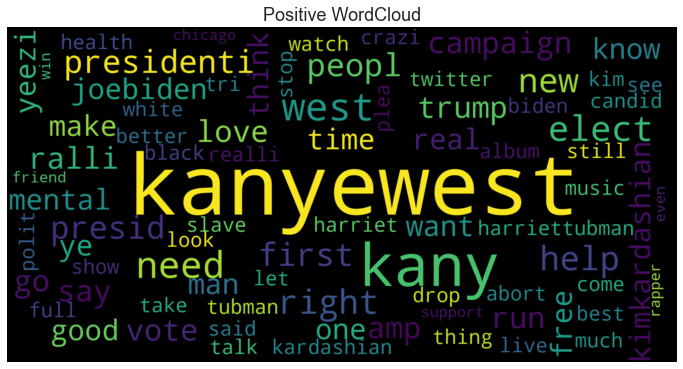

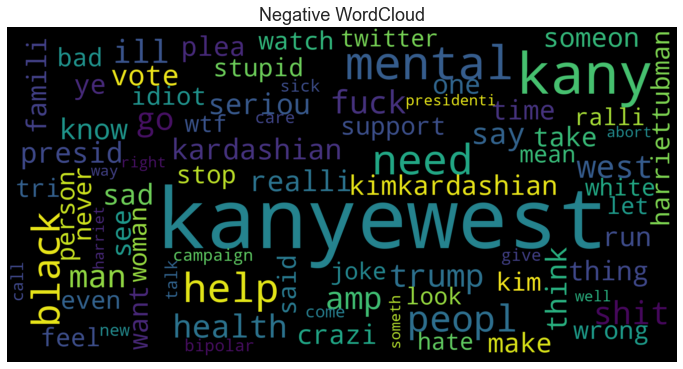

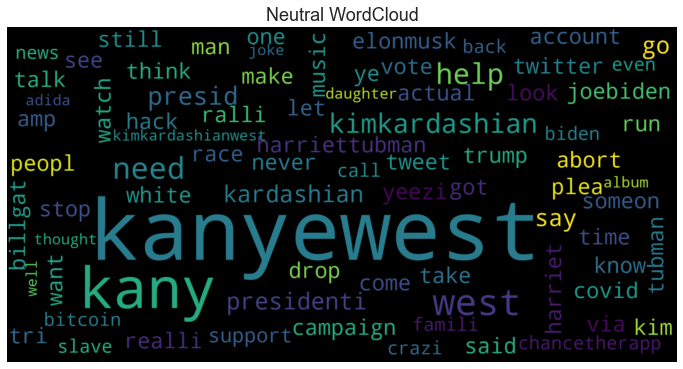

In [103]:
from wordcloud import WordCloud

#Posive Wordcloud
wordcloud1=WordCloud(background_color='black',max_words=80,max_font_size=50,scale=5,collocations=False,
                      normalize_plurals=True).generate(' '.join(pos_words))
    
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud1,interpolation='bilinear') 
plt.axis("off") 
plt.title("Positive WordCloud",fontsize=18)
plt.show()

#Negative Wordcloud
wordcloud2=WordCloud(background_color='black',max_words=80,max_font_size=50,scale=5,collocations=False,
                      normalize_plurals=True).generate(' '.join(neg_words))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud2,interpolation='bilinear') 
plt.axis("off") 
plt.title("Negative WordCloud",fontsize=18)
plt.show()

#Neutral WordCloud
wordcloud3=WordCloud(background_color='black',max_words=80,max_font_size=50,scale=5,collocations=False,
                      normalize_plurals=True).generate(' '.join(neu_words))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud3,interpolation='bilinear') 
plt.axis("off") 
plt.title("Neutral WordCloud",fontsize=18)
plt.show()

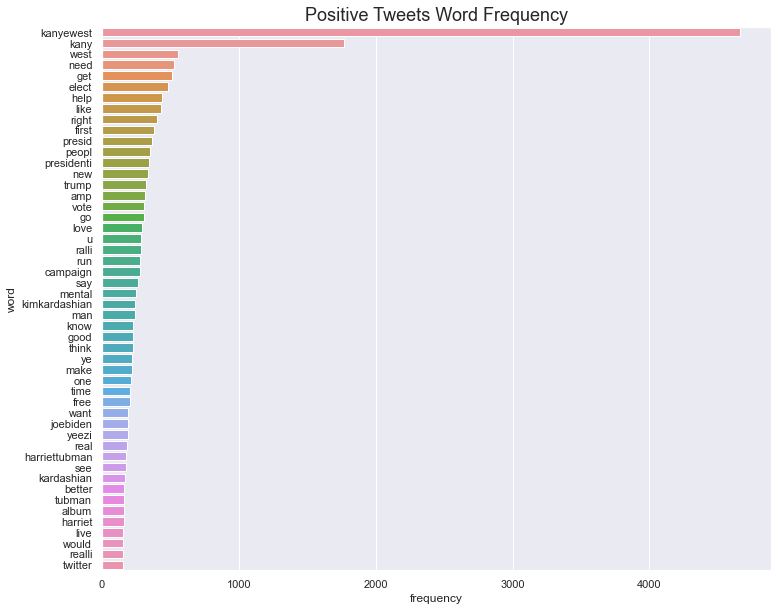

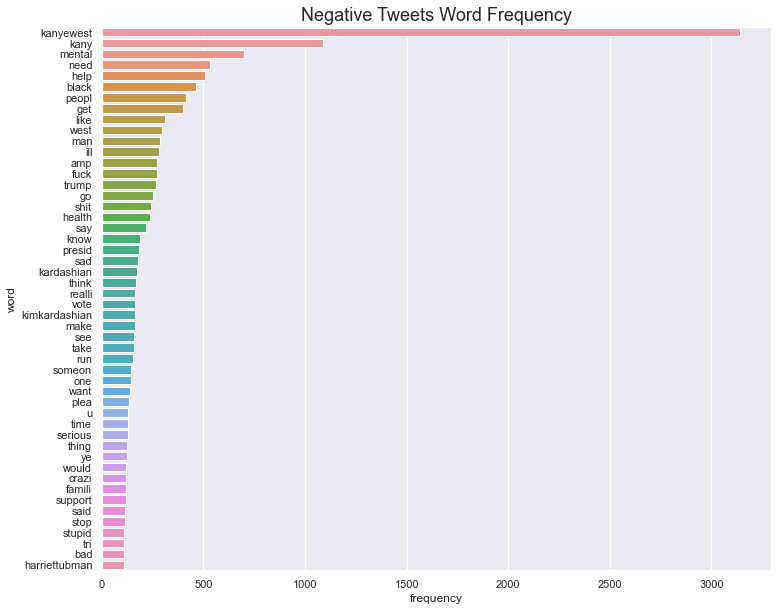

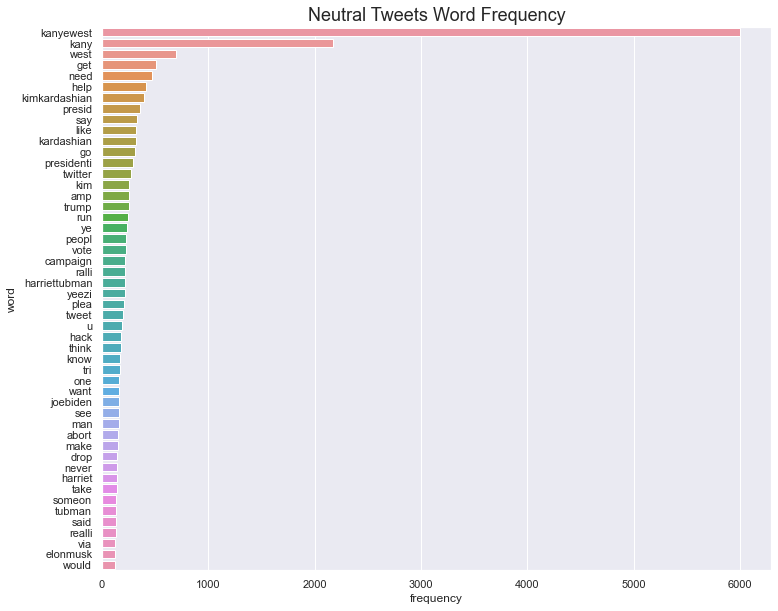

In [226]:
sns.set(style="darkgrid")
sns.set_context('notebook')

#Counting the word frequency of the positive tweets
counts = Counter(pos_words).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df.columns = ['word', 'frequency']
fig = plt.subplots(figsize = (12, 10))
plt.title("Positive Tweets Word Frequency",fontsize=18)
sns.barplot(y="word", x='frequency', data=counts_df)

#Counting the word frequency of the negative tweets
counts = Counter(neg_words).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df.columns = ['word', 'frequency']
fig = plt.subplots(figsize = (12, 10))
plt.title("Negative Tweets Word Frequency",fontsize=18)
sns.barplot(y="word", x='frequency', data=counts_df)

#Counting the word frequency of the neutral tweets
counts = Counter(neu_words).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df.columns = ['word', 'frequency']
fig = plt.subplots(figsize = (12, 10))
plt.title("Neutral Tweets Word Frequency",fontsize=18)
sns.barplot(y="word", x='frequency', data=counts_df)

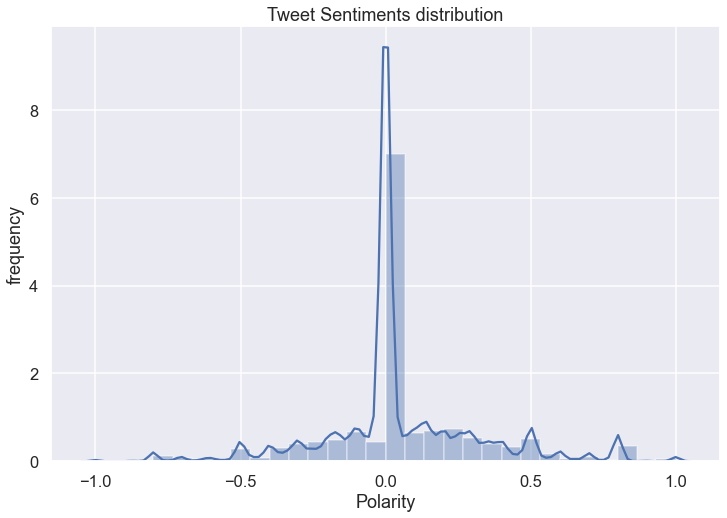

In [213]:
#Finding the frequency of the polarity
sns.set_context('talk')
fig,ax = plt.subplots(figsize = (12, 8))
ax.set(title='Tweet Sentiments distribution', xlabel='polarity', ylabel='frequency')
sns.distplot(kanye['Polarity'], bins=30)

This plot gives the distibution of the polarity of the tweets with a majority tweets either of neutral polarity or slightly of positive polarity. Lets check the count of the tweets.

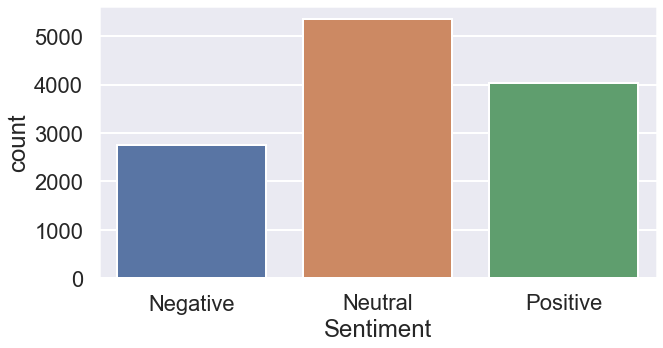

In [210]:
#Counting the number of different tweets
sns.set_style(style='darkgrid')
sns.set_context('poster')
fig= plt.figure(figsize=(10,5))
sns.countplot(kanye.Sentiment)

As we can see, majority of the tweets are of neutral sentiment.

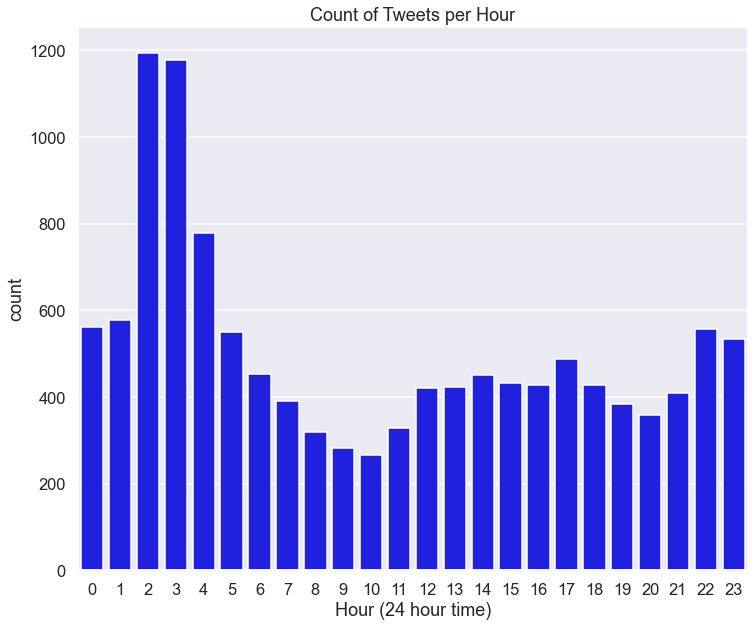

In [249]:
#Counting the number of tweets per hour
tweets['Date'] = pd.to_datetime(tweets['Date'])
hour = list(tweets.Date.dt.hour)
count_hours=Counter(hour)
sns.set_context("talk")
fig,ax=plt.subplots(figsize=(12,10))
ax.set(title='Count of Tweets per Hour', xlabel='Hour (24 hour time)', ylabel='count')
sns.barplot(x=list(count_hours.keys()),y=list(count_hours.values()),color='blue')

Suprisingly, we find that most number of tweets have been tweeted around the time of 02:00 to 03:00.

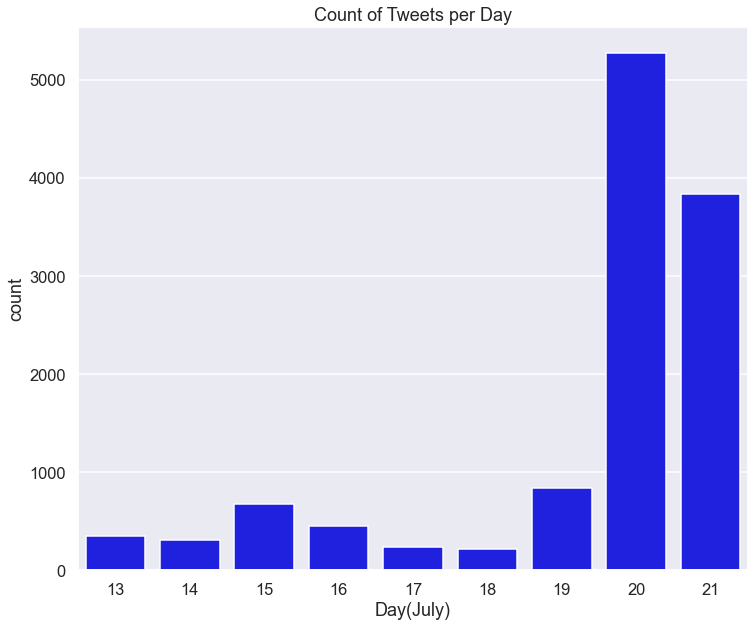

In [248]:
#Counting the number of tweets per day
tweets['Date'] = pd.to_datetime(tweets['Date'])
hour = list(tweets.Date.dt.day)
count_hours=Counter(hour)
sns.set_context("talk")
fig,ax=plt.subplots(figsize=(12,10))
ax.set(title='Count of Tweets per Day', xlabel='Day(July)', ylabel='count')
sns.barplot(x=list(count_hours.keys()),y=list(count_hours.values()),color='blue')

For most days, the number of tweets stayed below the 1000 count, but we see there is spike in the number of tweets on 20th and 21st July, thats when Kanye West had launched his first presidential rally. 